In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

datasets = tf.keras.datasets
layers = tf.keras.layers
models = tf.keras.models

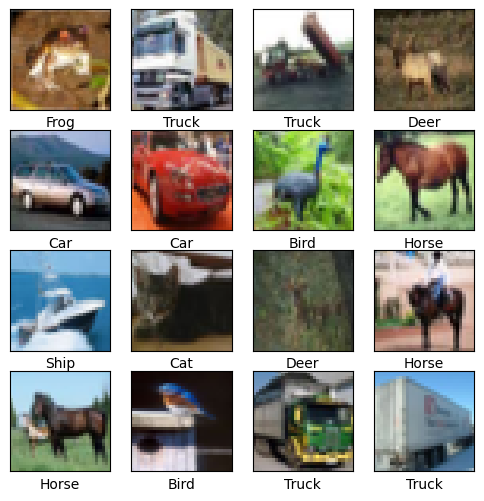

In [64]:
(training_images,training_labels), (testing_images,testing_labels) = datasets.cifar10.load_data()

training_images = training_images / 255.0
testing_images = testing_images / 255.0

class_names = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]




plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4, 4, i+1)  
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)  
    plt.xlabel(class_names[training_labels[i][0]])  

plt.show()

# Building and Training the Model

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))  # Fixed input_shape
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=12, validation_data=(testing_images, testing_labels))

loss , accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

model.save('image_classifier.keras')

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3305 - loss: 1.7989 - val_accuracy: 0.5418 - val_loss: 1.2563
Epoch 2/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5690 - loss: 1.2096 - val_accuracy: 0.6107 - val_loss: 1.0944
Epoch 3/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6366 - loss: 1.0381 - val_accuracy: 0.6402 - val_loss: 1.0135
Epoch 4/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6698 - loss: 0.9351 - val_accuracy: 0.6806 - val_loss: 0.9178
Epoch 5/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6980 - loss: 0.8504 - val_accuracy: 0.6911 - val_loss: 0.8924
Epoch 6/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7215 - loss: 0.7852 - val_accuracy: 0.6987 - val_loss: 0.8820
Epoch 7/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7346 - loss: 0.7530 - val_accuracy: 0.7053 - val_loss: 0.8393
Epoch 8/12
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7571 -

# Now we used the Trained Model and Test our model

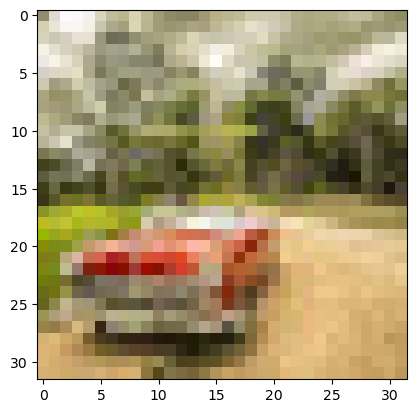

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction is Car


In [66]:

# Loading trained model
model = models.load_model('image_classifier.keras')

# Loading image
image_path = 'images/car-2.jpg'  # Ensure this path is correct
img = cv.imread(image_path)

# Check if image was loaded correctly
if img is None:
    raise ValueError(f"Error: Image at path '{image_path}' not found or unreadable.")

# Convert BGR to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


img = cv.resize(img, (32, 32))  


plt.imshow(img, cmap=plt.cm.binary)
plt.show()


img = np.array(img) / 255.0  # Normalizing  pixel values
img = np.expand_dims(img, axis=0)


prediction = model.predict(img)


index = np.argmax(prediction)


print(f'Prediction is {class_names[index]}')
